>## **Procesamiento Lenguaje Natural**
>>**Maestría en Analítica de Datos**

>>**Facultad de Ingeniería y Ciencias Básicas.**

>>**Universidad Central  2020 - 1**

>>> **Secciones** 
* Limpieza de datos
* Creación de características
    * Riqueza lexica
    * Frecuencias de palabras
* Caracteristicas de los Tweets
    * Etiquetas universales
    * Verbos mas usados
    * Raices de las palabras
    * Personas mencionadas en los tweets 


# Limpieza de Datos

* Importando librerias

In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from unidecode import unidecode
import string
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
import re

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


* Cargando la base de datos

In [2]:
base = pd.read_excel('base.xlsx')

In [3]:
base.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,Link(s),Media,Location,Retweets,Favorites,...,Followers,Follows,Listed,Verfied,User Since,Location.1,Bio,Website,Timezone,Profile Image
0,2020-04-02 20:33:38,@NeoMoncadaC,NeoMoncadaC,🤔 #elchicodelagorra #enmicasa #quedateencasa #...,1245887151134461954,https://www.instagram.com/p/B-gBvZDBURn/?igshi...,NaN,NaN,0,0,...,980,1527,3,NaN,2009-12-04 04:14:07,Bogotá - Colombia,"Soy Músico, Un Loco, Cantante De Ducha, Batero...",https://www.instagram.com/NeoMoncadaC,NaN,View
1,2020-04-02 20:32:13,@ComoRueda,Rueda Como Niña,¿Y usted qué opina de las #CiclovíasTemporales...,1245886794488479746,https://twitter.com/streetmix/status/124583252...,pic.twitter.com/b78c7vICbj,NaN,0,0,...,271,813,1,NaN,2018-09-03 20:47:54,"Bogotá, D.C., Colombia",#RuedaComoNiña org de mujeres #ciclistas y edu...,NaN,NaN,View
2,2020-04-02 20:30:32,@ColmundoRadio,Colmundo Radio,#Bogotá La alcaldesa de Bogotá @ClaudiaLopez S...,1245886370855485440,NaN,pic.twitter.com/h3SFKkOtIj,NaN,0,0,...,23102,1110,257,NaN,2010-01-07 13:53:25,Colombia,"Colmundo Cambia. #Acércate a las regiones, a l...",http://www.colmundoradio.com.co,NaN,View
3,2020-04-02 20:29:27,@AlfredoDeLaFe,Alfredo De La Fe,"En este nuevo video hablo de Tata Güines, unng...",1245886095168098304,https://www.facebook.com/107542989305981/posts...,NaN,NaN,1,1,...,5679,3698,36,NaN,2010-09-17 19:57:24,Colombia,"El encanto del Vallenato, el sentimiento de la...",https://www.youtube.com/watch?v=LC7PYMeY4Yo,NaN,View
4,2020-04-02 20:25:36,@Lunatica_1961,Laura,#Bogota #ConsumeLocal Apoyemos a las PYMES 👍🏼 ...,1245885125822427136,https://twitter.com/buendia_macond/status/1245...,NaN,NaN,0,0,...,438,1018,8,NaN,2010-07-11 18:50:08,Migrante,“No hay necesidad de apresurarse. No hay neces...,NaN,NaN,View


* Cargando los estring para eliminarlos de los tweets

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation + '?¿'])
    text = re.sub('[0-9]+', '', text)
    return text

base['Tweet Text'] = base['Tweet Text'].apply(lambda x: remove_punct(x))
base.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,Link(s),Media,Location,Retweets,Favorites,...,Followers,Follows,Listed,Verfied,User Since,Location.1,Bio,Website,Timezone,Profile Image
0,2020-04-02 20:33:38,@NeoMoncadaC,NeoMoncadaC,🤔 elchicodelagorra enmicasa quedateencasa lada...,1245887151134461954,https://www.instagram.com/p/B-gBvZDBURn/?igshi...,NaN,NaN,0,0,...,980,1527,3,NaN,2009-12-04 04:14:07,Bogotá - Colombia,"Soy Músico, Un Loco, Cantante De Ducha, Batero...",https://www.instagram.com/NeoMoncadaC,NaN,View
1,2020-04-02 20:32:13,@ComoRueda,Rueda Como Niña,Y usted qué opina de las CiclovíasTemporales d...,1245886794488479746,https://twitter.com/streetmix/status/124583252...,pic.twitter.com/b78c7vICbj,NaN,0,0,...,271,813,1,NaN,2018-09-03 20:47:54,"Bogotá, D.C., Colombia",#RuedaComoNiña org de mujeres #ciclistas y edu...,NaN,NaN,View
2,2020-04-02 20:30:32,@ColmundoRadio,Colmundo Radio,Bogotá La alcaldesa de Bogotá ClaudiaLopez Se ...,1245886370855485440,NaN,pic.twitter.com/h3SFKkOtIj,NaN,0,0,...,23102,1110,257,NaN,2010-01-07 13:53:25,Colombia,"Colmundo Cambia. #Acércate a las regiones, a l...",http://www.colmundoradio.com.co,NaN,View
3,2020-04-02 20:29:27,@AlfredoDeLaFe,Alfredo De La Fe,En este nuevo video hablo de Tata Güines unngr...,1245886095168098304,https://www.facebook.com/107542989305981/posts...,NaN,NaN,1,1,...,5679,3698,36,NaN,2010-09-17 19:57:24,Colombia,"El encanto del Vallenato, el sentimiento de la...",https://www.youtube.com/watch?v=LC7PYMeY4Yo,NaN,View
4,2020-04-02 20:25:36,@Lunatica_1961,Laura,Bogota ConsumeLocal Apoyemos a las PYMES 👍🏼 RT...,1245885125822427136,https://twitter.com/buendia_macond/status/1245...,NaN,NaN,0,0,...,438,1018,8,NaN,2010-07-11 18:50:08,Migrante,“No hay necesidad de apresurarse. No hay neces...,NaN,NaN,View


* Funcion Diseñada para terminar la limpieza (puntuación, palabras de parada y lematización)

In [6]:
tweets= base['Tweet Text']

In [7]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
from nltk.stem import WordNetLemmatizer


def remove_in_words(lista_textos):
    ### input: lista de textos
    ### retorna una nueva lista eliminando puntuacion y numeros de las letras
    punct = list(string.punctuation)
    texto_total = []
    for parrafos in lista_textos:
        parrafo = []
        for palabra in parrafos.split():
            palabras = []
            for letra in palabra.lower():
                if letra not in punct and not letra.isnumeric():
                    palabras.append(letra)
            palabras = ''.join(palabras)
            parrafo.append(palabras)
        parrafo = ' '.join(parrafo)
        texto_total.append(parrafo)
    return texto_total


def pre_process(lista_corpus):
    ### input: lista de textos
    ### retorna una nueva lista eliminando stopwords, numeros y puntuacion de las palabras
    stopset = stopwords.words('spanish') + list(string.punctuation)
    parrafos_list = []
    for corp in lista_corpus:
        corpus = corp.lower()
        corpus = " ".join([i for i in word_tokenize(corpus) if i not in stopset and not i.isnumeric() and len(i) > 2])
        corpus = unidecode(corpus)
        parrafos_list.append(corpus)
    return parrafos_list 


def lemm(lista_corpus):
    ### input: lista de textos
    ### retorna una nueva lista lematizada por adjetivo, adverbio, pronombre, verbo
    lmt = WordNetLemmatizer()
    parrafos = []
    for corp in lista_corpus:
        texto = []
        for word in corp.split():
            lema = word.lower()
            for i in list(['v','a','r','n','s']):
                lema = lmt.lemmatize(lema, pos=i)
            texto.append(lema)
        texto = ' '.join(texto)
        parrafos.append(texto)
    return parrafos

In [8]:
parrafos_list = remove_in_words(tweets)
parrafos_list = pre_process(parrafos_list)
parrafos_list = lemm(parrafos_list)

In [9]:
parrafos_list

['elchicodelagorra enmicasa quedateencasa lada cuarentena bogota boy amoreterno love amor amordedios',
 'usted opina cicloviastemporales bogota streetmix new streetmix today temporary barrier include traffic con barricade and jersey barrier perfect for separate from quickly now available all user play your street',
 'bogota alcaldesa bogota claudialopez manifesto gobierno nacional apoyo migrantes venezolanos puede calificar alcaldia bogota xenofoba bogota',
 'nuevo video hablo tata guines unngran amigo mejores alfredodelafe salsa colombia salsadancing bogota salseros merengue music musica medellin salsaromantica rumba panama mexico cali venezuela musicacubana',
 'bogota consumelocal apoyemos pymes buendiamacond amigs encuentro situacion economica dificil vivo bogota tienda frutos secos semillas snack saludables mani nuez almendras quinoa etc cualquier cosa necesiten orden medio domicilios agradeceria',
 'centro comercial diverplaza alamo cerrado gente afuera haciendo bogota claudialope

* Tokenizando los Tweets

In [10]:

def listToString(s):  
    
    str1 = ""  
    
    
    for ele in s:  
        str1 += ele   
    
       
    return str1  
     
        
# Driver code     
s = parrafos_list
print(listToString(s))

elchicodelagorra enmicasa quedateencasa lada cuarentena bogota boy amoreterno love amor amordediosusted opina cicloviastemporales bogota streetmix new streetmix today temporary barrier include traffic con barricade and jersey barrier perfect for separate from quickly now available all user play your streetbogota alcaldesa bogota claudialopez manifesto gobierno nacional apoyo migrantes venezolanos puede calificar alcaldia bogota xenofoba bogotanuevo video hablo tata guines unngran amigo mejores alfredodelafe salsa colombia salsadancing bogota salseros merengue music musica medellin salsaromantica rumba panama mexico cali venezuela musicacubanabogota consumelocal apoyemos pymes buendiamacond amigs encuentro situacion economica dificil vivo bogota tienda frutos secos semillas snack saludables mani nuez almendras quinoa etc cualquier cosa necesiten orden medio domicilios agradeceriacentro comercial diverplaza alamo cerrado gente afuera haciendo bogota claudialopez infopresidencia policiaco

In [11]:
twees_str = listToString(s)

In [12]:
### Creando Tokens
pattern = r'''(?x)                 
              (?:[A-Z]\.)+         
              | \w+(?:-\w+)*       
              | \$?\d+(?:\.\d+)?%? 
              | \.\.\.             
              | [][.,;"'?():-_`]   
'''
tokens = nltk.regexp_tokenize(twees_str, pattern) ### Tokenizar con nltk 

In [13]:
tokens[0:10]

['elchicodelagorra',
 'enmicasa',
 'quedateencasa',
 'lada',
 'cuarentena',
 'bogota',
 'boy',
 'amoreterno',
 'love',
 'amor']

In [14]:
tokens.remove("...")

In [15]:
tokens.remove(".")

In [16]:
vocabulario = sorted(set(tokens)) ### funcion set, coje lista de tokens y donde haya tokens repetidos, solo los deja una vez , sorted para convertir diccionario en lista
print(vocabulario)

['"', "'", '(', ')', ',', '.', '...', '<', '>', '?', '[', ']', '`', 'a', 'aaa', 'aaaah', 'aaahhh', 'aabenedetti', 'aachenenvivo', 'aajsv', 'aakaarphidpktiaid', 'aalepe', 'aankh', 'aanmember', 'aaoficial', 'aapp', 'aaruedaz', 'aateosbta', 'aavvloslirios', 'aba', 'abajo', 'abajocarajo', 'abalikounderstand', 'abalos', 'abalosdimision', 'abalosmeco', 'abandon', 'abandonada', 'abandonadas', 'abandonado', 'abandonados', 'abandonan', 'abandonando', 'abandonar', 'abandonemos', 'abandono', 'abanicos', 'abarca', 'abarrotada', 'abarrotado', 'abarrotan', 'abascal', 'abastece', 'abastecen', 'abastecer', 'abastecera', 'abastecerlos', 'abastecerse', 'abastecerte', 'abastecida', 'abastecido', 'abastecimiento', 'abastecimientoatencion', 'abastecimientodesarrolloeconomicogovco', 'abasto', 'abastobogota', 'abastos', 'abbott', 'abc', 'abccardinal', 'abccienciadinero', 'abcconocermundo', 'abcconocervoluntarios', 'abcdesevilladeja', 'abceconomiaacojonados', 'abcengaliciahitler', 'abces', 'abcespana', 'abces

# Calculando la riqueza lexica del texto

## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

In [17]:
rl = len(vocabulario)/len(tokens)
print(rl)

0.20856667044200866


# Frecuencias de palabras

* Creando diccionario donde se guardaran las frecuencias de las palabras

In [18]:
dic = {}
for palabra in set(tokens): ### for contar cuantas veces aparece la palabra en el texto
    dic[palabra] = tokens.count(palabra)
dic

{'berdugo': 1,
 'mandatarios': 5,
 'protescie': 1,
 'solidaridadyhermandadparticular': 1,
 'outcome': 1,
 'fueramanalich': 2,
 'especialistassntesalud': 1,
 'abusos': 2,
 'nadamal': 1,
 'spanish': 4,
 'dhlmexayuda': 4,
 'constantementemarzo': 1,
 'comunidadlgbt': 1,
 'eldorado': 5,
 'mranonymoustc': 1,
 'ocles': 2,
 'enjuanes': 1,
 'relacion': 18,
 'castillo': 9,
 'empresario': 7,
 'verstrynge': 1,
 'distanciacodvidrespuestas': 1,
 'significativa': 1,
 'osoanteojos': 1,
 'desdeventana': 1,
 'acuse': 1,
 'primero': 43,
 'aislamos': 2,
 'entusiasmados': 1,
 'pasteles': 1,
 'jodiendo': 4,
 'nacholozano': 1,
 'juntosderrotaremosalcoronavirus': 1,
 'bogotamiiraayngaanwaa': 1,
 'llamachinayuda': 1,
 'geancapan': 1,
 'humor': 23,
 'cienciascall': 1,
 'kudos': 3,
 'fincas': 3,
 'guardan': 4,
 'codvidno': 1,
 'gratishistoria': 1,
 'delgados': 1,
 'comunicarnos': 1,
 'ocupen': 1,
 'salga': 37,
 'panycirconoticias': 1,
 'recordado': 2,
 'cerocalle': 1,
 'necesarioexcusas': 1,
 'casaaaahora': 1,
 

In [19]:
fdist = FreqDist(tokens)

In [20]:
del fdist['[']
del fdist[']']
del fdist['?']
del fdist['...']

* Mostrando las palabras mas frecuentes dentro de los tweets

In [21]:
fdist.most_common(50) # mostrar las palabras mas comunes

[('bogota', 6606),
 ('codvid', 5745),
 ('covid', 2459),
 ('colombia', 1954),
 ('coronavirus', 1867),
 ('cuarentena', 1511),
 ('quedateencasa', 1130),
 ('dia', 1085),
 ('casos', 809),
 ('persona', 784),
 ('hoy', 729),
 ('casa', 674),
 ('salud', 620),
 ('claudialopez', 613),
 ('gobierno', 584),
 ('yomequedoencasa', 569),
 ('pais', 561),
 ('encuarentena', 532),
 ('solo', 523),
 ('ser', 485),
 ('gente', 484),
 ('asi', 473),
 ('pandemia', 472),
 ('medellin', 428),
 ('hacer', 418),
 ('mundo', 412),
 ('mexico', 411),
 ('crisis', 400),
 ('marzo', 397),
 ('toda', 390),
 ('cuarentenacoronavirus', 384),
 ('the', 383),
 ('medidas', 373),
 ('hace', 359),
 ('via', 359),
 ('ahora', 356),
 ('ano', 353),
 ('puede', 339),
 ('virus', 338),
 ('aqui', 325),
 ('ciudad', 324),
 ('quedateenlacasa', 313),
 ('gracias', 295),
 ('quedateencasaya', 294),
 ('vida', 292),
 ('atencion', 275),
 ('aislamiento', 272),
 ('venezuela', 271),
 ('mejor', 268),
 ('presidente', 265)]

* Grafico con las 20 palabras mas frecuentes

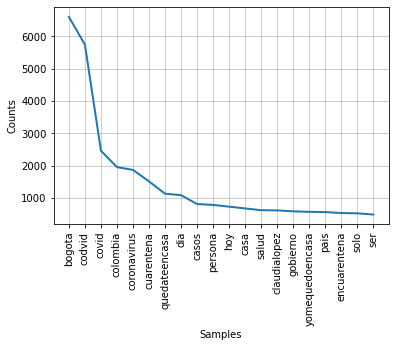

In [22]:
fdist.plot(20)

# Caracteristicas de los Tweets

* Este proceso se realizo con ayuda de la libreria spacy

In [24]:
import spacy
import es_core_news_sm
nlp=spacy.load("es_core_news_sm")
from spacy import displacy

In [25]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation + '?¿'])
    text = re.sub('[0-9]+', '', text)
    return text

base['Tweet Text'] = base['Tweet Text'].apply(lambda x: remove_punct(x))
base.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,Link(s),Media,Location,Retweets,Favorites,...,Followers,Follows,Listed,Verfied,User Since,Location.1,Bio,Website,Timezone,Profile Image
0,2020-04-02 20:33:38,@NeoMoncadaC,NeoMoncadaC,🤔 elchicodelagorra enmicasa quedateencasa lada...,1245887151134461954,https://www.instagram.com/p/B-gBvZDBURn/?igshi...,NaN,NaN,0,0,...,980,1527,3,NaN,2009-12-04 04:14:07,Bogotá - Colombia,"Soy Músico, Un Loco, Cantante De Ducha, Batero...",https://www.instagram.com/NeoMoncadaC,NaN,View
1,2020-04-02 20:32:13,@ComoRueda,Rueda Como Niña,Y usted qué opina de las CiclovíasTemporales d...,1245886794488479746,https://twitter.com/streetmix/status/124583252...,pic.twitter.com/b78c7vICbj,NaN,0,0,...,271,813,1,NaN,2018-09-03 20:47:54,"Bogotá, D.C., Colombia",#RuedaComoNiña org de mujeres #ciclistas y edu...,NaN,NaN,View
2,2020-04-02 20:30:32,@ColmundoRadio,Colmundo Radio,Bogotá La alcaldesa de Bogotá ClaudiaLopez Se ...,1245886370855485440,NaN,pic.twitter.com/h3SFKkOtIj,NaN,0,0,...,23102,1110,257,NaN,2010-01-07 13:53:25,Colombia,"Colmundo Cambia. #Acércate a las regiones, a l...",http://www.colmundoradio.com.co,NaN,View
3,2020-04-02 20:29:27,@AlfredoDeLaFe,Alfredo De La Fe,En este nuevo video hablo de Tata Güines unngr...,1245886095168098304,https://www.facebook.com/107542989305981/posts...,NaN,NaN,1,1,...,5679,3698,36,NaN,2010-09-17 19:57:24,Colombia,"El encanto del Vallenato, el sentimiento de la...",https://www.youtube.com/watch?v=LC7PYMeY4Yo,NaN,View
4,2020-04-02 20:25:36,@Lunatica_1961,Laura,Bogota ConsumeLocal Apoyemos a las PYMES 👍🏼 RT...,1245885125822427136,https://twitter.com/buendia_macond/status/1245...,NaN,NaN,0,0,...,438,1018,8,NaN,2010-07-11 18:50:08,Migrante,“No hay necesidad de apresurarse. No hay neces...,NaN,NaN,View


* Convertir la lista de twees en tokes

In [26]:
TOK_list = []

for tweet in base['Tweet Text'].to_list():
    
    tweet1=nlp(tweet)
    
    TOK=[]
    for token in tweet1:
        TOK.append([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
                token.shape_, token.is_alpha, token.is_stop,token.ent_type_])
        
    TOK_list.append(TOK)

In [27]:
lista_de_listas = []

for elemento in TOK_list:
    for elemento2 in elemento:
        lista_de_listas.append(elemento2)

* Mostrando los tokens generados y las entidades generadas

In [28]:
final = pd.DataFrame(data=lista_de_listas,columns=["Text","Lemma","POS","Tag","Dep","Shape","alpha","stop","Tipo Entidad"])
final.head()

,Text,Lemma,POS,Tag,Dep,Shape,alpha,stop,Tipo Entidad
0,🤔,🤔,PROPN,PROPN___,nsubj,🤔,False,False,MISC
1,elchicodelagorra,elchicodelagorra,PROPN,PROPN___,flat,xxxx,True,False,
2,enmicasa,enmicasa,PROPN,PROPN___,flat,xxxx,True,False,
3,quedateencasa,quedateencasa,PROPN,PROPN___,ROOT,xxxx,True,False,
4,lada,lada,ADJ,ADJ__Gender=Fem|Number=Sing|VerbForm=Part,obj,xxxx,True,False,


* Cantidad de Tokens Generados

In [29]:
len(final)

442879

* Etiquetas universales

In [30]:
final['Dep'].value_counts()

flat         65165
case         53682
det          44600
obj          42671
nsubj        27547
nmod         25520
amod         22570
obl          18898
advmod       16498
ROOT         15649
mark         13680
appos        12799
conj         12577
             11454
cc           11411
advcl        11326
aux           7449
cop           6013
acl           5752
fixed         4065
ccomp         4054
csubj         2489
xcomp         1799
punct         1689
nummod        1246
compound      1089
iobj           998
expl:pass      114
parataxis       56
dep             19
Name: Dep, dtype: int64

In [31]:
final['POS'].value_counts()

PROPN    117747
NOUN      69261
ADP       61401
DET       44546
VERB      39680
ADJ       25437
PRON      18953
ADV       15717
AUX       14845
CONJ      11788
SPACE     11454
SCONJ      8327
NUM        2295
PUNCT      1213
INTJ        104
PART         85
SYM          24
X             2
Name: POS, dtype: int64

# Verbos usados en los tweets

In [32]:
VERB = final[final['POS']=='VERB']
VERB

,Text,Lemma,POS,Tag,Dep,Shape,alpha,stop,Tipo Entidad
5,cuarentena,cuarentena,VERB,VERB__Mood=Ind|Number=Sing|Person=3|Tense=Pres...,amod,xxxx,True,False,
15,opina,opinar,VERB,VERB__Mood=Ind|Number=Sing|Person=3|Tense=Pres...,ccomp,xxxx,True,False,
22,streetmix,streetmix,VERB,VERB__VerbForm=Inf,ROOT,xxxx,True,False,
68,manifestó,manifestar,VERB,VERB__Mood=Ind|Number=Sing|Person=3|Tense=Past...,advcl,xxxx,True,True,
87,calificar,calificar,VERB,VERB__VerbForm=Inf,acl,xxxx,True,False,
...,...,...,...,...,...,...,...,...,...
442839,levanta,levantar,VERB,VERB__Mood=Ind|Number=Sing|Person=3|Tense=Pres...,amod,xxxx,True,False,
442842,Vamos,Vamos,VERB,VERB__Mood=Ind|Number=Plur|Person=1|Tense=Pres...,conj,Xxxxx,True,True,LOC
442846,ECUADOR,ECUADOR,VERB,VERB__Mood=Ind|Number=Plur|Person=1|Tense=Imp|...,advmod,XXXX,True,False,LOC
442852,hacer,hacer,VERB,VERB__VerbForm=Inf,acl,xxxx,True,True,


In [33]:
freq = VERB['Lemma'].value_counts().nlargest(15)
freq

tener          1495
hacer          1285
dar             667
salir           595
decir           572
ver             516
cuarentena      486
estar           459
llegar          385
querer          383
pasar           380
coronavirus     373
ir              361
trabajar        320
saber           313
Name: Lemma, dtype: int64

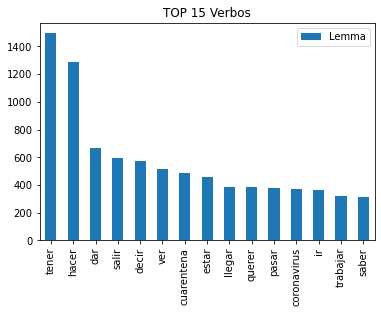

In [34]:
freq.plot(kind = 'bar', legend = True, title = 'TOP 15 Verbos') 

# Raices de las palabras usadas en los tweets

In [35]:
ROOT = final[final['Dep']=='ROOT']
ROOT

,Text,Lemma,POS,Tag,Dep,Shape,alpha,stop,Tipo Entidad
3,quedateencasa,quedateencasa,PROPN,PROPN___,ROOT,xxxx,True,False,
22,streetmix,streetmix,VERB,VERB__VerbForm=Inf,ROOT,xxxx,True,False,
61,Bogotá,Bogotá,PROPN,PROPN___,ROOT,Xxxxx,True,False,
95,xenófoba,xenófobo,PROPN,PROPN___,ROOT,xxxx,True,False,
103,hablo,hablar,VERB,VERB__Mood=Ind|Number=Sing|Person=1|Tense=Pres...,ROOT,xxxx,True,False,
...,...,...,...,...,...,...,...,...,...
442762,metí,meter,VERB,VERB__Mood=Ind|Number=Sing|Person=1|Tense=Past...,ROOT,xxxx,True,False,
442790,olviden,olvidar,VERB,VERB__Mood=Ind|Number=Plur|Person=3|Tense=Pres...,ROOT,xxxx,True,False,MISC
442813,Presidente,Presidente,ADV,ADV___,ROOT,Xxxxx,True,False,MISC
442855,mataCODVID,mataCODVID,PROPN,PROPN___,ROOT,xxxxXXXX,True,False,


In [36]:
freq_root = ROOT['Lemma'].value_counts().nlargest(15)
freq_root

tener            351
ser              286
hacer            231
haber            205
decir            192
Trabajo          173
QuedateEnCasa    171
dar              163
Bogotá           127
ver              119
cuarentena       109
CODVID           108
saber            105
querer           104
Bogota            98
Name: Lemma, dtype: int64

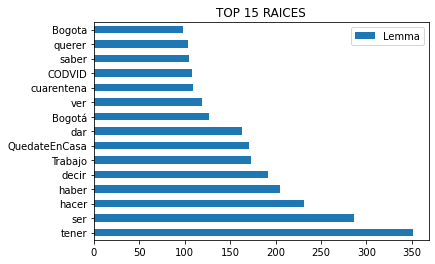

In [37]:
freq_root.plot(kind = 'barh', legend = True, title = 'TOP 15 RAICES') 

# Personas mencionadadas en los tweets

In [53]:
PER = final[final['Tipo Entidad']=='PER']
PER

,Text,Lemma,POS,Tag,Dep,Shape,alpha,stop,Tipo Entidad
20,Bogotá,Bogotá,PROPN,PROPN___,nmod,Xxxxx,True,False,PER
21,RT,RT,PROPN,PROPN___,flat,XX,True,False,PER
105,Tata,Tata,PROPN,PROPN___,obj,Xxxx,True,False,PER
106,Güines,Güines,PROPN,PROPN___,flat,Xxxxx,True,False,PER
304,Hipócritas,Hipócritas,PROPN,PROPN___,nsubj,Xxxxx,True,False,PER
...,...,...,...,...,...,...,...,...,...
442723,MAPFRE,MAPFRE,PROPN,PROPN___,obl,XXXX,True,False,PER
442724,YoMeQuedoEnCasa,YoMeQuedoEnCasa,PROPN,PROPN___,appos,XxXxXxxxxXxXxxx,True,False,PER
442725,CODVID,CODVID,PROPN,PROPN___,flat,XXXX,True,False,PER
442827,Asambleístas,Asambleístas,PROPN,PROPN___,nsubj,Xxxxx,True,False,PER


In [54]:
freq_per = PER['Text'].value_counts().nlargest(15)
freq_per

Bogotá          933
RT              278
🏻               186
de              180
Covid           164
Coronavirus     163
Cundinamarca    159
CODVID          147
Qué             145
¡               140
Bogota          137
ClaudiaLopez    127
México          122
Cuarentena      100
López           100
Name: Text, dtype: int64

In [55]:
del freq_per['RT']
del freq_per['de']
del freq_per['Qué']
del freq_per['¡']
del freq_per['🏻']

In [56]:
freq_per

Bogotá          933
Covid           164
Coronavirus     163
Cundinamarca    159
CODVID          147
Bogota          137
ClaudiaLopez    127
México          122
Cuarentena      100
López           100
Name: Text, dtype: int64

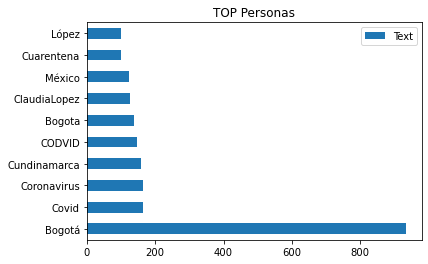

In [57]:
freq_per.plot(kind = 'barh', legend = True, title = 'TOP Personas')